<a href="https://colab.research.google.com/github/lilynguyen371/lilynguyen371/blob/main/DP2407_Do_an_cuoi_ky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/drive/MyDrive/Amazon Customer Behavior Survey.csv')
df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Browsing_Frequency,Product_Search_Method,Rating_Accuracy_Recommendations,Search_Result_Exploration,Customer_Reviews_Importance,...,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation,Recommendation_Helpfulness,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Few times a week,Keyword,1,Multiple pages,1,...,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Few times a month,Keyword,3,Multiple pages,1,...,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,Few times a month,Keyword,3,Multiple pages,2,...,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Few times a month,Keyword,3,First page,5,...,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Few times a month,Filter,2,Multiple pages,1,...,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Few times a week,categories,3,Multiple pages,4,...,Found a better price elsewhere,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Few times a week,Filter,3,Multiple pages,3,...,Found a better price elsewhere,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Few times a week,categories,2,Multiple pages,3,...,High shipping costs,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Few times a month,Keyword,2,Multiple pages,1,...,others,Sometimes,No,Heavily,Yes,2,Yes,2,Wide product selection,Product quality and accuracy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Timestamp                        602 non-null    object
 1   age                              602 non-null    int64 
 2   Gender                           602 non-null    object
 3   Purchase_Frequency               602 non-null    object
 4   Purchase_Categories              602 non-null    object
 5   Browsing_Frequency               602 non-null    object
 6   Product_Search_Method            600 non-null    object
 7   Rating_Accuracy_Recommendations  602 non-null    int64 
 8   Search_Result_Exploration        602 non-null    object
 9   Customer_Reviews_Importance      602 non-null    int64 
 10  Add_to_Cart_Browsing             602 non-null    object
 11  Cart_Completion_Frequency        602 non-null    object
 12  Cart_Abandonment_Factors         602

Kết luận: Không có missing value

In [ ]:
duplicate_rows = df.duplicated()
print(duplicate_rows[duplicate_rows == True])

Series([], dtype: bool)


Kết luận: Không có duplicated value

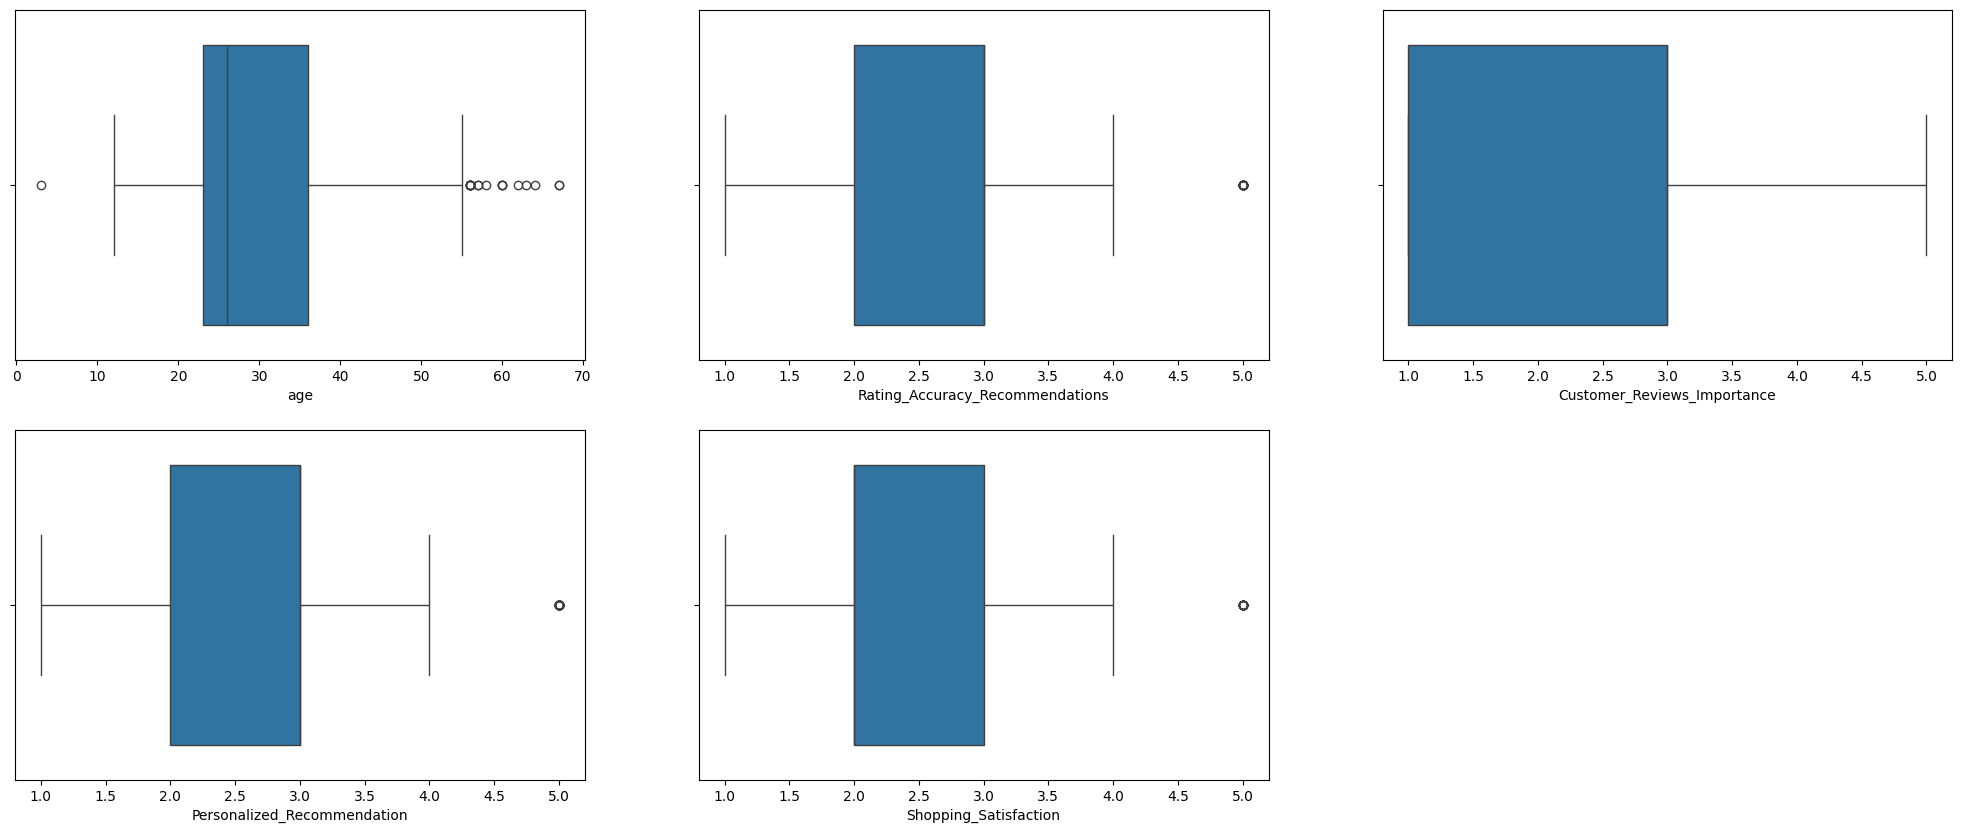

In [ ]:
fig = plt.figure(figsize=(25,10))
plt.subplot(2,3,1)
sns.boxplot(x= 'age', data= df)
plt.subplot(2,3,2)
sns.boxplot(x= 'Rating_Accuracy_Recommendations', data= df)
plt.subplot(2,3,3)
sns.boxplot(x= 'Customer_Reviews_Importance', data= df)
plt.subplot(2,3,4)
sns.boxplot(x= 'Personalized_Recommendation', data= df)
plt.subplot(2,3,5)
sns.boxplot(x= 'Shopping_Satisfaction', data= df)
plt.savefig("outliers.png")
plt.show()

Outlier của biến Rating_Accuracy_Recommendations, Personalized_Recommendation, Shopping_Satisfaction được giữ nguyên vì giá trị vẫn thuộc thang đo đánh giá là 5
Phân tích thêm outlier của biến Age

Xác định outlier bằng tứ phân vị

In [ ]:
import numpy as np
# IQR
Q1 = np.percentile(df['age'], 25, method='midpoint')
Q3 = np.percentile(df['age'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)
# Above Upper bound
upper = Q3+1.5*IQR
print(upper)
upper_array = np.array(df['age'] >= upper)
print("Upper Bound:", upper)
print(upper_array.sum())

# Below Lower bound
lower = Q1-1.5*IQR
lower_array = np.array(df['age'] <= lower)
print("Lower Bound:", lower)
print(lower_array.sum())
print('Percent of outlier',(upper_array.sum()+lower_array.sum())/601)


13.0
55.5
Upper Bound: 55.5
19
Lower Bound: 3.5
1
Percent of outlier 0.033277870216306155


Outlier của age chỉ chiếm 3% tiến hành xóa data oulier

In [ ]:
df = df.drop(df[df['age'] >= 53].index)
df = df.drop(df[df['age'] <= 3.5].index)
df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Browsing_Frequency,Product_Search_Method,Rating_Accuracy_Recommendations,Search_Result_Exploration,Customer_Reviews_Importance,...,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation,Recommendation_Helpfulness,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Few times a week,Keyword,1,Multiple pages,1,...,Found a better price elsewhere,Sometimes,Yes,Occasionally,Yes,2,Yes,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Few times a month,Keyword,3,Multiple pages,1,...,High shipping costs,Rarely,No,Heavily,Yes,2,Sometimes,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,Few times a month,Keyword,3,Multiple pages,2,...,Found a better price elsewhere,Rarely,No,Occasionally,No,4,No,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Few times a month,Keyword,3,First page,5,...,Found a better price elsewhere,Sometimes,Yes,Heavily,Yes,3,Sometimes,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Few times a month,Filter,2,Multiple pages,1,...,High shipping costs,Rarely,No,Heavily,Yes,4,Yes,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Few times a week,categories,3,Multiple pages,4,...,Found a better price elsewhere,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Few times a week,Filter,3,Multiple pages,3,...,Found a better price elsewhere,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Few times a week,categories,2,Multiple pages,3,...,High shipping costs,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Few times a month,Keyword,2,Multiple pages,1,...,others,Sometimes,No,Heavily,Yes,2,Yes,2,Wide product selection,Product quality and accuracy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 0 to 601
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Timestamp                        573 non-null    object
 1   age                              573 non-null    int64 
 2   Gender                           573 non-null    object
 3   Purchase_Frequency               573 non-null    object
 4   Purchase_Categories              573 non-null    object
 5   Browsing_Frequency               573 non-null    object
 6   Product_Search_Method            571 non-null    object
 7   Rating_Accuracy_Recommendations  573 non-null    int64 
 8   Search_Result_Exploration        573 non-null    object
 9   Customer_Reviews_Importance      573 non-null    int64 
 10  Add_to_Cart_Browsing             573 non-null    object
 11  Cart_Completion_Frequency        573 non-null    object
 12  Cart_Abandonment_Factors         573 non-

<Axes: xlabel='age'>

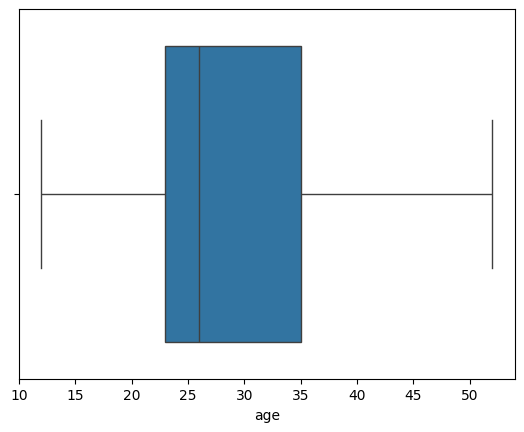

In [ ]:
sns.boxplot(x= 'age', data= df)

Chuyển các biến định tính với thang đo thứ bậc thành biến định lượng để phân tích. Chuyển theo thang đo Likert từ 1-5 theo mức độ tiêu cực - tích cực dưới quan điểm của nhà bán hàng Amazon

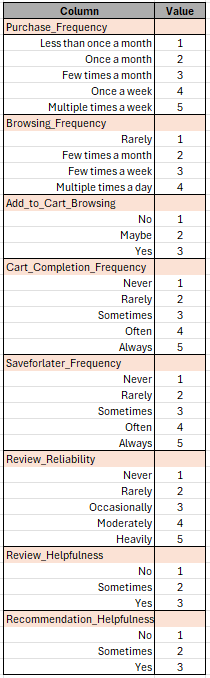

In [ ]:
df['Purchase_Frequency'] = df['Purchase_Frequency'].replace(['Less than once a month', 'Once a month', 'Few times a month', 'Once a week','Multiple times a week'], [1, 2, 3, 4,5])
df['Browsing_Frequency'] = df['Browsing_Frequency'].replace(['Rarely', 'Few times a month', 'Few times a week', 'Multiple times a day'], [1, 2, 3, 4])
df['Add_to_Cart_Browsing'] = df['Add_to_Cart_Browsing'].replace(['No', 'Maybe', 'Yes'], [1, 2, 3])
df['Cart_Completion_Frequency'] = df['Cart_Completion_Frequency'].replace(['Never', 'Rarely', 'Sometimes', 'Often','Always'], [1, 2, 3, 4,5])
df['Saveforlater_Frequency'] = df['Saveforlater_Frequency'].replace(['Never', 'Rarely', 'Sometimes', 'Often','Always'], [1, 2, 3, 4,5])
df['Review_Reliability'] = df['Review_Reliability'].replace(['Never', 'Rarely', 'Occasionally', 'Moderately','Heavily'], [1, 2, 3, 4,5])
df['Review_Helpfulness'] = df['Review_Helpfulness'].replace(['No', 'Sometimes', 'Yes'], [1, 2, 3])
df['Recommendation_Helpfulness'] = df['Recommendation_Helpfulness'].replace(['No', 'Sometimes', 'Yes'], [1, 2, 3])
df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Browsing_Frequency,Product_Search_Method,Rating_Accuracy_Recommendations,Search_Result_Exploration,Customer_Reviews_Importance,...,Cart_Abandonment_Factors,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation,Recommendation_Helpfulness,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,3,Beauty and Personal Care,3,Keyword,1,Multiple pages,1,...,Found a better price elsewhere,3,Yes,3,3,2,3,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,2,Clothing and Fashion,2,Keyword,3,Multiple pages,1,...,High shipping costs,2,No,5,3,2,2,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,3,Groceries and Gourmet Food;Clothing and Fashion,2,Keyword,3,Multiple pages,2,...,Found a better price elsewhere,2,No,3,1,4,1,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,2,Beauty and Personal Care;Clothing and Fashion;...,2,Keyword,3,First page,5,...,Found a better price elsewhere,3,Yes,5,3,3,2,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,1,Beauty and Personal Care;Clothing and Fashion,2,Filter,2,Multiple pages,1,...,High shipping costs,2,No,5,3,4,3,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,4,Beauty and Personal Care,3,categories,3,Multiple pages,4,...,Found a better price elsewhere,3,Yes,4,2,3,2,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,4,Clothing and Fashion,3,Filter,3,Multiple pages,3,...,Found a better price elsewhere,3,Yes,5,2,3,2,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,2,Beauty and Personal Care,3,categories,2,Multiple pages,3,...,High shipping costs,3,Yes,3,2,3,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,3,Beauty and Personal Care;Clothing and Fashion;...,2,Keyword,2,Multiple pages,1,...,others,3,No,5,3,2,3,2,Wide product selection,Product quality and accuracy


Không cần kiểm tra giá trị ngoại lai nữa vì thang đo ngắn đã được chuẩn hóa chuyển qua định lượng nên với đơn vị nhỏ nên hầu như không có giá trị ngoại lai tương tự như các biến đã kiểm tra ở trên

Tiền xử lý biến Gender. Xóa các giá trị ngoài Male và Female

In [ ]:
df.drop(df.loc[df['Gender'] == 'Prefer not to say'].index, inplace=True)
#['Female', 'Prefer not to say', 'Male', 'Others']

In [ ]:
df.drop(df.loc[df['Gender'] == 'Others'].index, inplace=True)

Cập nhật lại số biến định lượng

In [ ]:
print(type(df.info()))

<class 'pandas.core.frame.DataFrame'>
Index: 473 entries, 0 to 601
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Timestamp                        473 non-null    object
 1   age                              473 non-null    int64 
 2   Gender                           473 non-null    object
 3   Purchase_Frequency               473 non-null    int64 
 4   Purchase_Categories              473 non-null    object
 5   Browsing_Frequency               473 non-null    int64 
 6   Product_Search_Method            471 non-null    object
 7   Rating_Accuracy_Recommendations  473 non-null    int64 
 8   Search_Result_Exploration        473 non-null    object
 9   Customer_Reviews_Importance      473 non-null    int64 
 10  Add_to_Cart_Browsing             473 non-null    int64 
 11  Cart_Completion_Frequency        473 non-null    int64 
 12  Cart_Abandonment_Factors         473 non-

In [ ]:
df.describe()

,age,Purchase_Frequency,Browsing_Frequency,Rating_Accuracy_Recommendations,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Review_Helpfulness,Personalized_Recommendation,Recommendation_Helpfulness,Shopping_Satisfaction
count,473.000000,473.000000,473.000000,473.00000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000
mean,29.310782,2.739958,2.543340,2.64482,2.403805,2.196617,3.251586,3.097252,3.739958,2.241015,2.644820,2.008457,2.412262
std,8.368033,1.266430,0.874984,0.88338,1.219434,0.757329,0.877039,1.094600,1.001074,0.768176,1.031629,0.747830,1.000645
min,12.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,2.000000,2.000000,2.00000,1.000000,2.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,2.000000
50%,26.000000,3.000000,3.000000,3.00000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,3.000000,2.000000,2.000000
75%,35.000000,4.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,5.000000,3.000000,3.000000,3.000000,3.000000
max,52.000000,5.000000,4.000000,5.00000,5.000000,3.000000,5.000000,5.000000,5.000000,3.000000,5.000000,3.000000,5.000000


Tạo danh sách biến định tính và biến định lượng

In [ ]:
df_quantiative = pd.DataFrame(data={})

In [ ]:
df_quantiative = pd.DataFrame(data={})
df_qualitiative = pd.DataFrame(data={})
for i in df.columns.values:
  if df[i].dtype == 'int64':
    df_quantiative[i] = df[i]
  else:
    df_qualitiative[i] = df[i]

In [ ]:
df_quantiative

,age,Purchase_Frequency,Browsing_Frequency,Rating_Accuracy_Recommendations,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Review_Helpfulness,Personalized_Recommendation,Recommendation_Helpfulness,Shopping_Satisfaction
0,23,3,3,1,1,3,3,3,3,3,2,3,1
1,23,2,2,3,1,3,4,2,5,3,2,2,2
3,24,2,2,3,5,2,3,3,5,3,3,2,4
4,22,1,2,2,1,3,3,2,5,3,4,3,2
5,21,1,1,5,1,3,2,1,5,3,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,23,4,3,3,4,2,3,3,4,2,3,2,4
598,23,4,3,3,3,2,3,3,5,2,3,2,3
599,23,2,3,2,3,2,3,3,3,2,3,2,3
600,23,3,2,2,1,3,4,3,5,3,2,3,2


In [ ]:
df_qualitiative

,Timestamp,Gender,Purchase_Categories,Product_Search_Method,Search_Result_Exploration,Cart_Abandonment_Factors,Review_Left,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,Female,Beauty and Personal Care,Keyword,Multiple pages,Found a better price elsewhere,Yes,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,Female,Clothing and Fashion,Keyword,Multiple pages,High shipping costs,No,Wide product selection,Reducing packaging waste
3,2023/06/04 5:13:00 PM GMT+5:30,Female,Beauty and Personal Care;Clothing and Fashion;...,Keyword,First page,Found a better price elsewhere,Yes,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,Female,Beauty and Personal Care;Clothing and Fashion,Filter,Multiple pages,High shipping costs,No,Competitive prices,Product quality and accuracy
5,2023/06/04 6:01:59 PM GMT+5:30,Female,Clothing and Fashion,categories,Multiple pages,Changed my mind or no longer need the item,No,Wide product selection,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,Female,Beauty and Personal Care,categories,Multiple pages,Found a better price elsewhere,Yes,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,Female,Clothing and Fashion,Filter,Multiple pages,Found a better price elsewhere,Yes,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,Female,Beauty and Personal Care,categories,Multiple pages,High shipping costs,Yes,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,Female,Beauty and Personal Care;Clothing and Fashion;...,Keyword,Multiple pages,others,No,Wide product selection,Product quality and accuracy


<Axes: xlabel='age', ylabel='Count'>

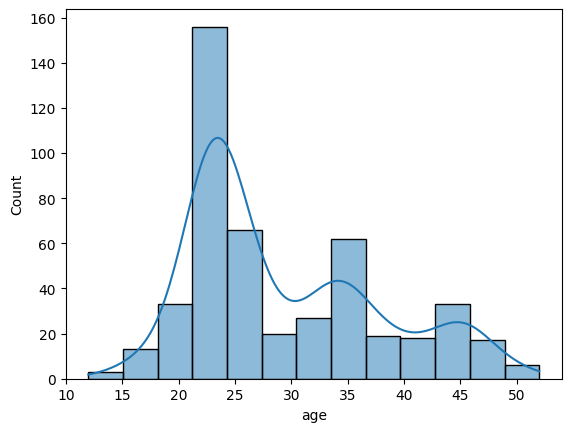

In [ ]:
sns.histplot(df_quantiative['age'],kde=True)

In [ ]:
df_quantiative = df_quantiative.drop(['age'], axis=1)
df_quantiative

,Purchase_Frequency,Browsing_Frequency,Rating_Accuracy_Recommendations,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Review_Helpfulness,Personalized_Recommendation,Recommendation_Helpfulness,Shopping_Satisfaction
0,3,3,1,1,3,3,3,3,3,2,3,1
1,2,2,3,1,3,4,2,5,3,2,2,2
3,2,2,3,5,2,3,3,5,3,3,2,4
4,1,2,2,1,3,3,2,5,3,4,3,2
5,1,1,5,1,3,2,1,5,3,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
597,4,3,3,4,2,3,3,4,2,3,2,4
598,4,3,3,3,2,3,3,5,2,3,2,3
599,2,3,2,3,2,3,3,3,2,3,2,3
600,3,2,2,1,3,4,3,5,3,2,3,2


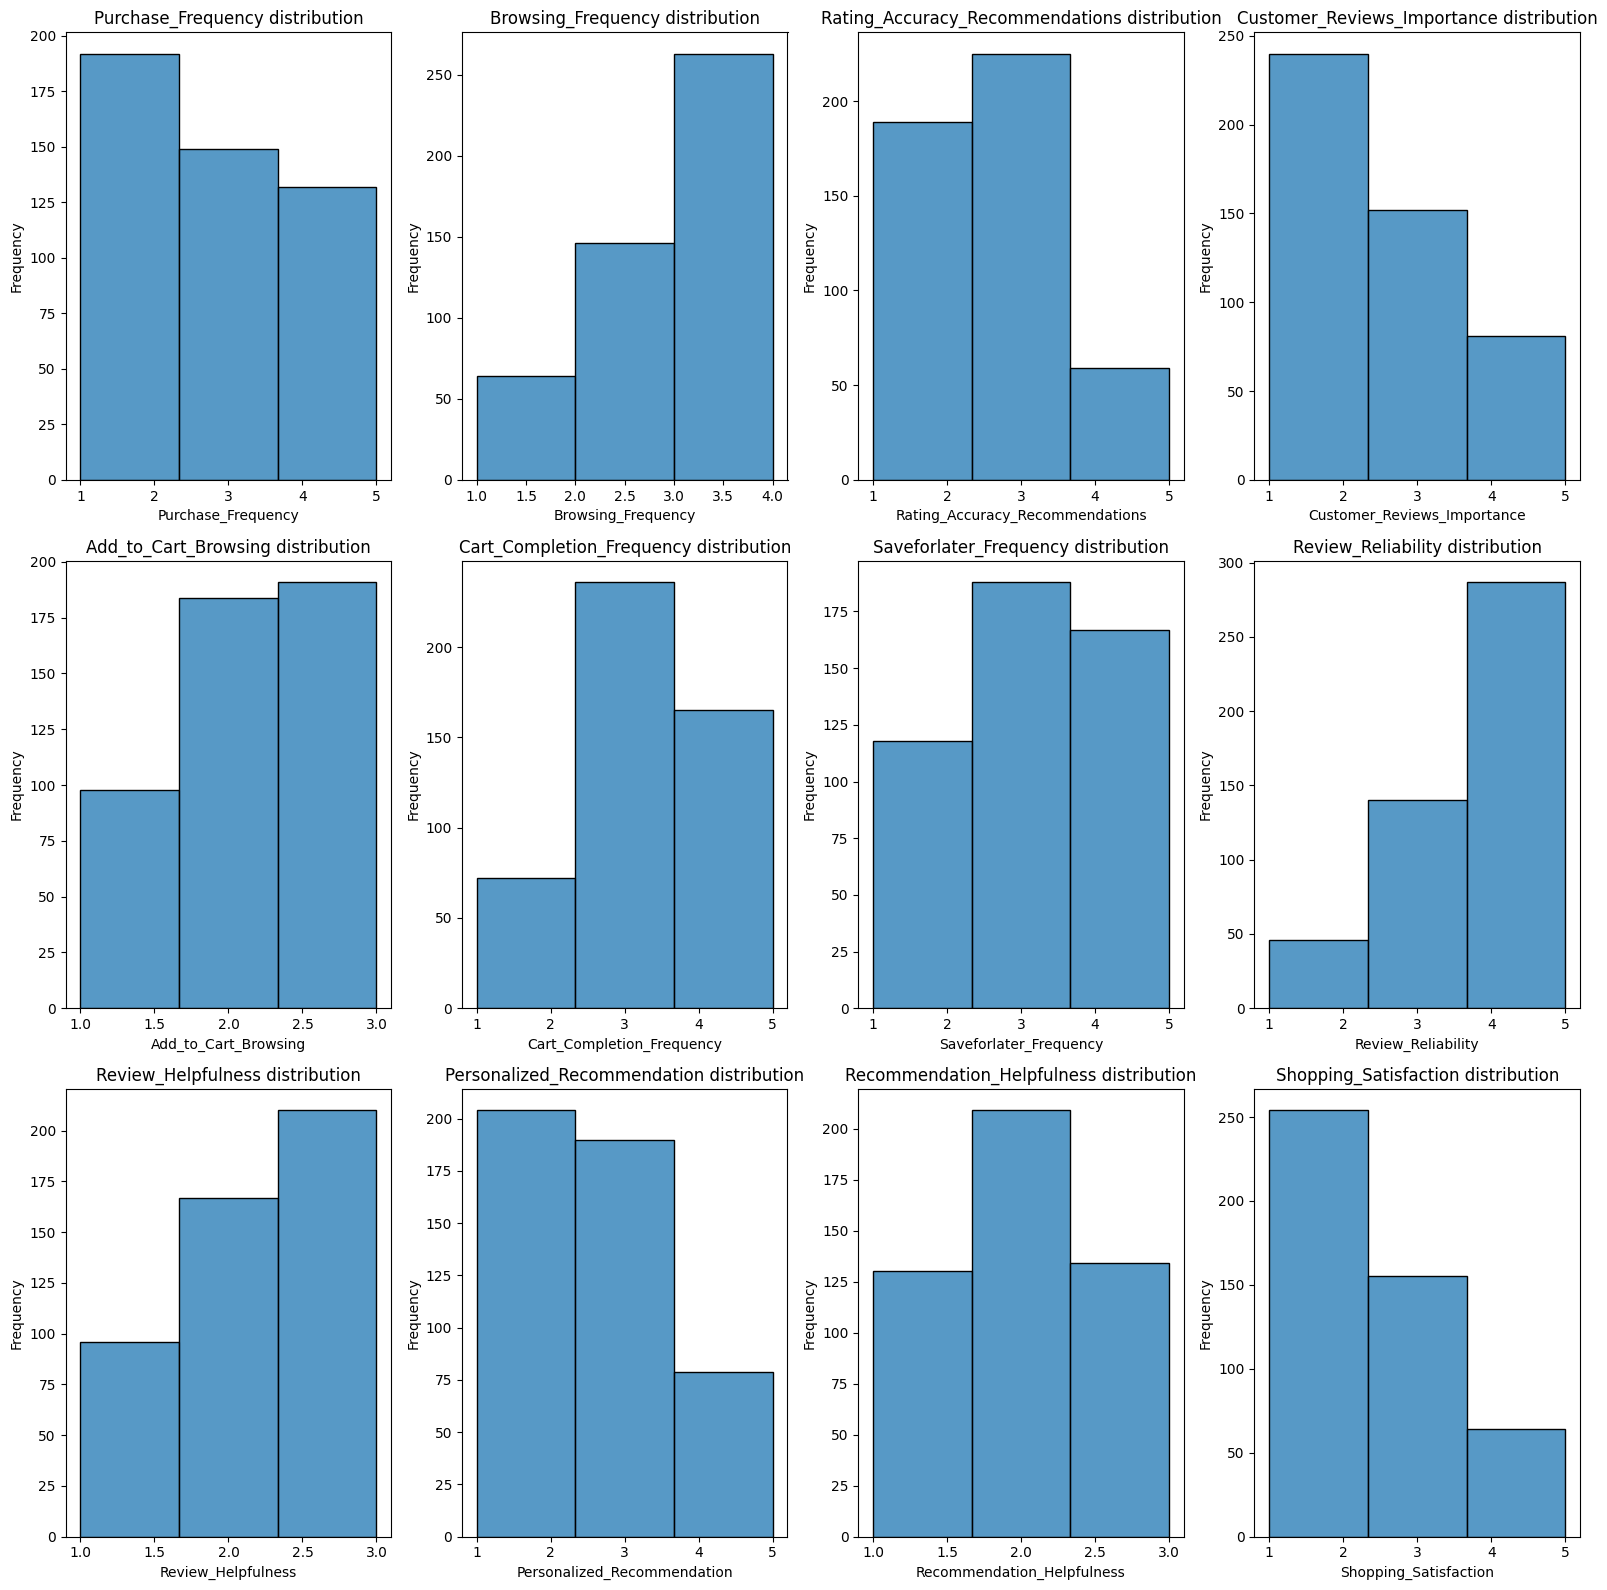

In [ ]:
# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 16))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df_quantiative.columns):
    # Add the histogram
    sns.histplot(df_quantiative[column], bins = 3, ax=axes[i])

    # Add title and axis label
    axes[i].set_title(f'{column} distribution')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

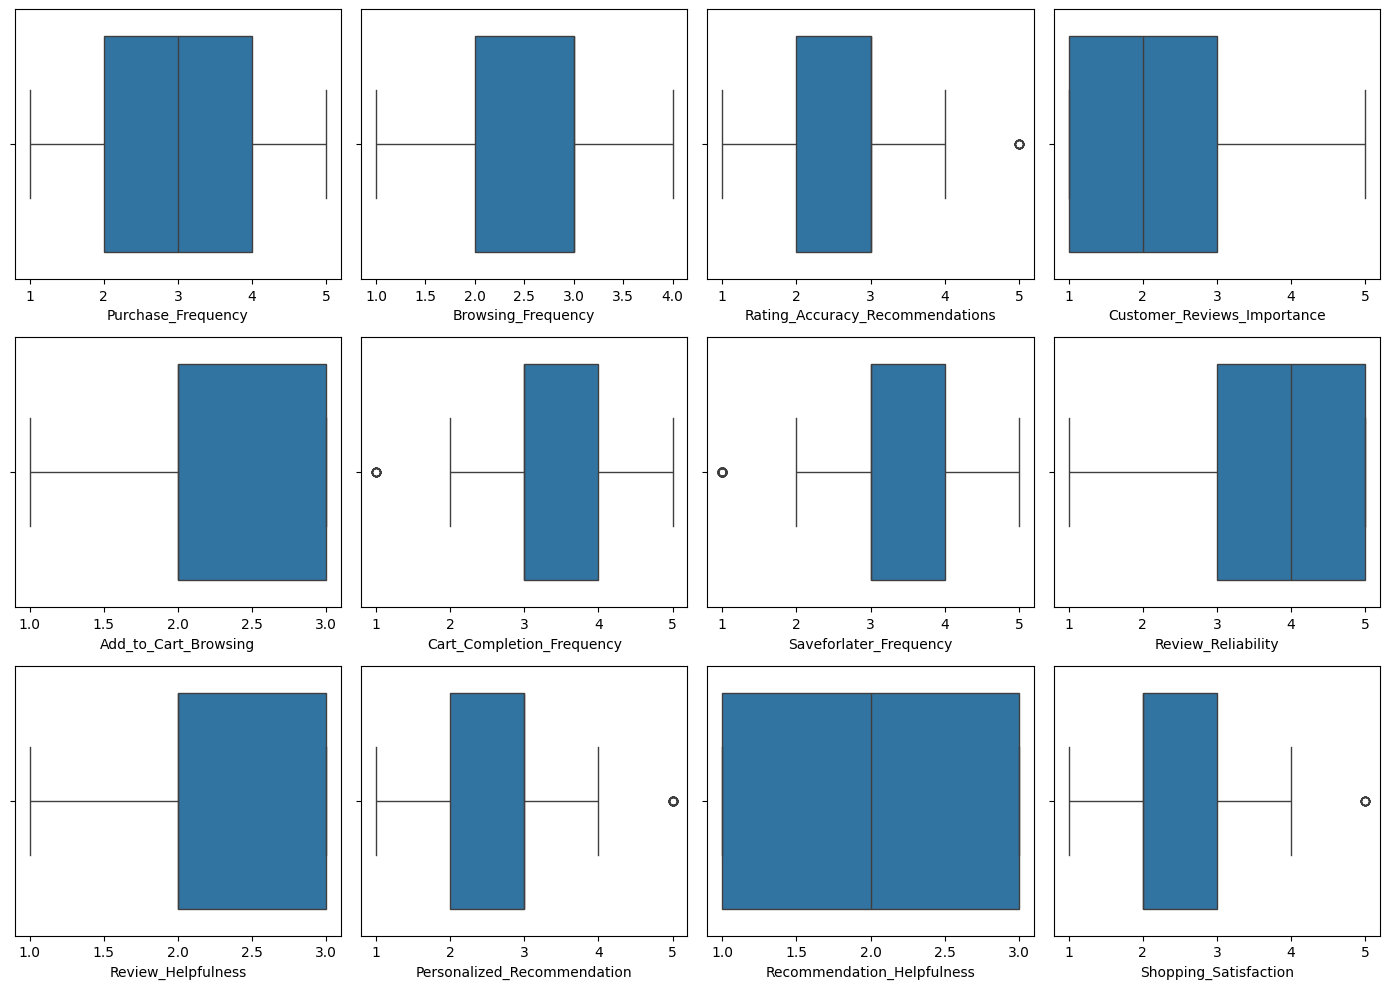

In [ ]:
# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(14, 10))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df_quantiative.columns):
    # Add the histogram
    sns.boxplot(x=f'{column}', ax=axes[i], data= df_quantiative)
    #sns.histplot(df_quantiative[column], bins = 3, ax=axes[i])

    # Add title and axis label

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

<Axes: >

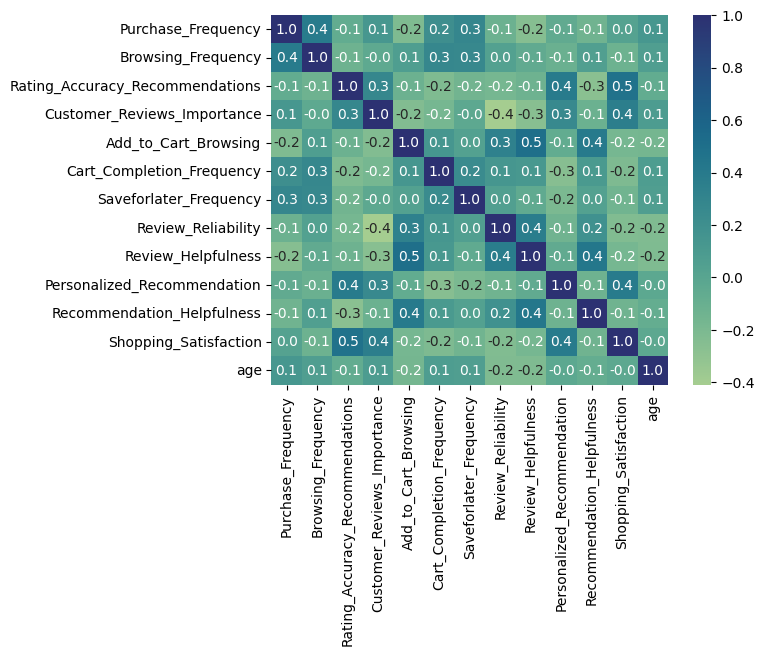

In [ ]:
df_quantiative['age']=df['age']
sns.heatmap(df_quantiative.corr(),annot=True, fmt=".1f",cmap="crest")

In [ ]:
df_qualitiative = df_qualitiative.drop(columns=['Timestamp'])
df_qualitiative

,Gender,Purchase_Categories,Product_Search_Method,Search_Result_Exploration,Cart_Abandonment_Factors,Review_Left,Service_Appreciation,Improvement_Areas
0,Female,Beauty and Personal Care,Keyword,Multiple pages,Found a better price elsewhere,Yes,Competitive prices,Reducing packaging waste
1,Female,Clothing and Fashion,Keyword,Multiple pages,High shipping costs,No,Wide product selection,Reducing packaging waste
3,Female,Beauty and Personal Care;Clothing and Fashion;...,Keyword,First page,Found a better price elsewhere,Yes,Competitive prices,Product quality and accuracy
4,Female,Beauty and Personal Care;Clothing and Fashion,Filter,Multiple pages,High shipping costs,No,Competitive prices,Product quality and accuracy
5,Female,Clothing and Fashion,categories,Multiple pages,Changed my mind or no longer need the item,No,Wide product selection,Product quality and accuracy
...,...,...,...,...,...,...,...,...
597,Female,Beauty and Personal Care,categories,Multiple pages,Found a better price elsewhere,Yes,Competitive prices,Customer service responsiveness
598,Female,Clothing and Fashion,Filter,Multiple pages,Found a better price elsewhere,Yes,Product recommendations,Reducing packaging waste
599,Female,Beauty and Personal Care,categories,Multiple pages,High shipping costs,Yes,Wide product selection,Product quality and accuracy
600,Female,Beauty and Personal Care;Clothing and Fashion;...,Keyword,Multiple pages,others,No,Wide product selection,Product quality and accuracy


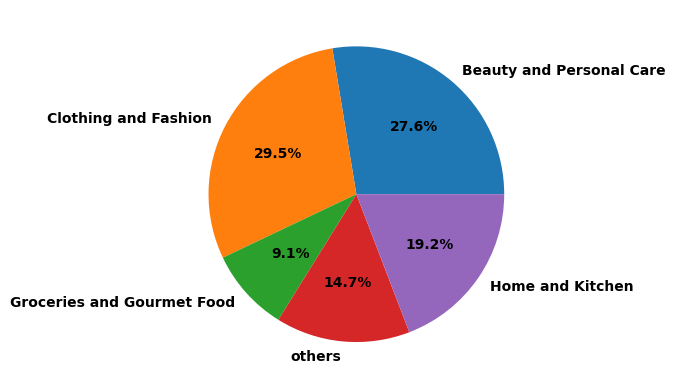

In [ ]:
Purchase_Categories_Dict = {'Beauty and Personal Care':0,'Clothing and Fashion':0,'Groceries and Gourmet Food':0,'others':0,'Home and Kitchen':0}
for i in Purchase_Categories_Dict:
  for j in df_qualitiative['Purchase_Categories']:
      if i in j:
          Purchase_Categories_Dict[i] += 1
Purchase_Categories_Dict.keys()
Purchase_Categories_Dict.values()
plt.pie(Purchase_Categories_Dict.values(), autopct='%.1f%%',
        labels=Purchase_Categories_Dict.keys(),
        textprops={ 'weight': 'bold'}
       )

plt.show()

In [ ]:
df_qualitiative.shape[0]

473

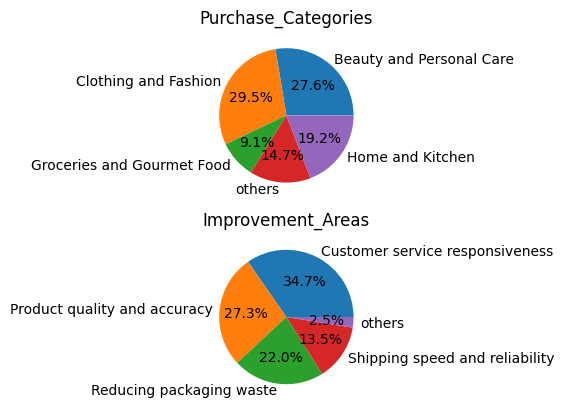

In [ ]:
Purchase_Categories_Dict = {'Beauty and Personal Care':0,'Clothing and Fashion':0,'Groceries and Gourmet Food':0,'others':0,'Home and Kitchen':0}
for i in Purchase_Categories_Dict:
  for j in df_qualitiative['Purchase_Categories']:
      if i in j:
          Purchase_Categories_Dict[i] += 1
Purchase_Categories_Dict.keys()
Purchase_Categories_Dict.values()

Improvement_Areas_Dict = {'Customer service responsiveness':0,'Product quality and accuracy':0,'Reducing packaging waste':0,'Shipping speed and reliability':0,'others':0}
for i in Improvement_Areas_Dict:
  for j in df_qualitiative['Improvement_Areas']:
      if i in j:
        Improvement_Areas_Dict[i] += 1
Improvement_Areas_Dict['others'] = df_qualitiative.shape[0] - (Improvement_Areas_Dict['Customer service responsiveness']+Improvement_Areas_Dict['Product quality and accuracy']+Improvement_Areas_Dict['Reducing packaging waste']+Improvement_Areas_Dict['Shipping speed and reliability'])

plt.subplot(2,1,1)
plt.pie(Purchase_Categories_Dict.values(), autopct='%.1f%%',
        labels=Purchase_Categories_Dict.keys(),
       )
plt.title("Purchase_Categories")
plt.subplot(2,1,2)
plt.pie(Improvement_Areas_Dict.values(), autopct='%.1f%%',
        labels=Improvement_Areas_Dict.keys(),
       )
plt.title("Improvement_Areas")
plt.show()

In [ ]:
df_qualitiative = df_qualitiative.drop(columns=['Purchase_Categories','Improvement_Areas'])
df_qualitiative

,Gender,Product_Search_Method,Search_Result_Exploration,Cart_Abandonment_Factors,Review_Left,Service_Appreciation
0,Female,Keyword,Multiple pages,Found a better price elsewhere,Yes,Competitive prices
1,Female,Keyword,Multiple pages,High shipping costs,No,Wide product selection
3,Female,Keyword,First page,Found a better price elsewhere,Yes,Competitive prices
4,Female,Filter,Multiple pages,High shipping costs,No,Competitive prices
5,Female,categories,Multiple pages,Changed my mind or no longer need the item,No,Wide product selection
...,...,...,...,...,...,...
597,Female,categories,Multiple pages,Found a better price elsewhere,Yes,Competitive prices
598,Female,Filter,Multiple pages,Found a better price elsewhere,Yes,Product recommendations
599,Female,categories,Multiple pages,High shipping costs,Yes,Wide product selection
600,Female,Keyword,Multiple pages,others,No,Wide product selection


Xử lý data cho'Purchase_Categories'

In [ ]:
df_qualitiative.Service_Appreciation.replace(['.','Customer service','Quick delivery','All the above','Customer service'], ['others','others','others','others','others'], inplace=True)

In [ ]:
df_qualitiative['Service_Appreciation'].value_counts(dropna=False)

,count
Service_Appreciation,
Competitive prices,138
Product recommendations,135
Wide product selection,133
User-friendly website/app interface,62
others,4
Customer service,1


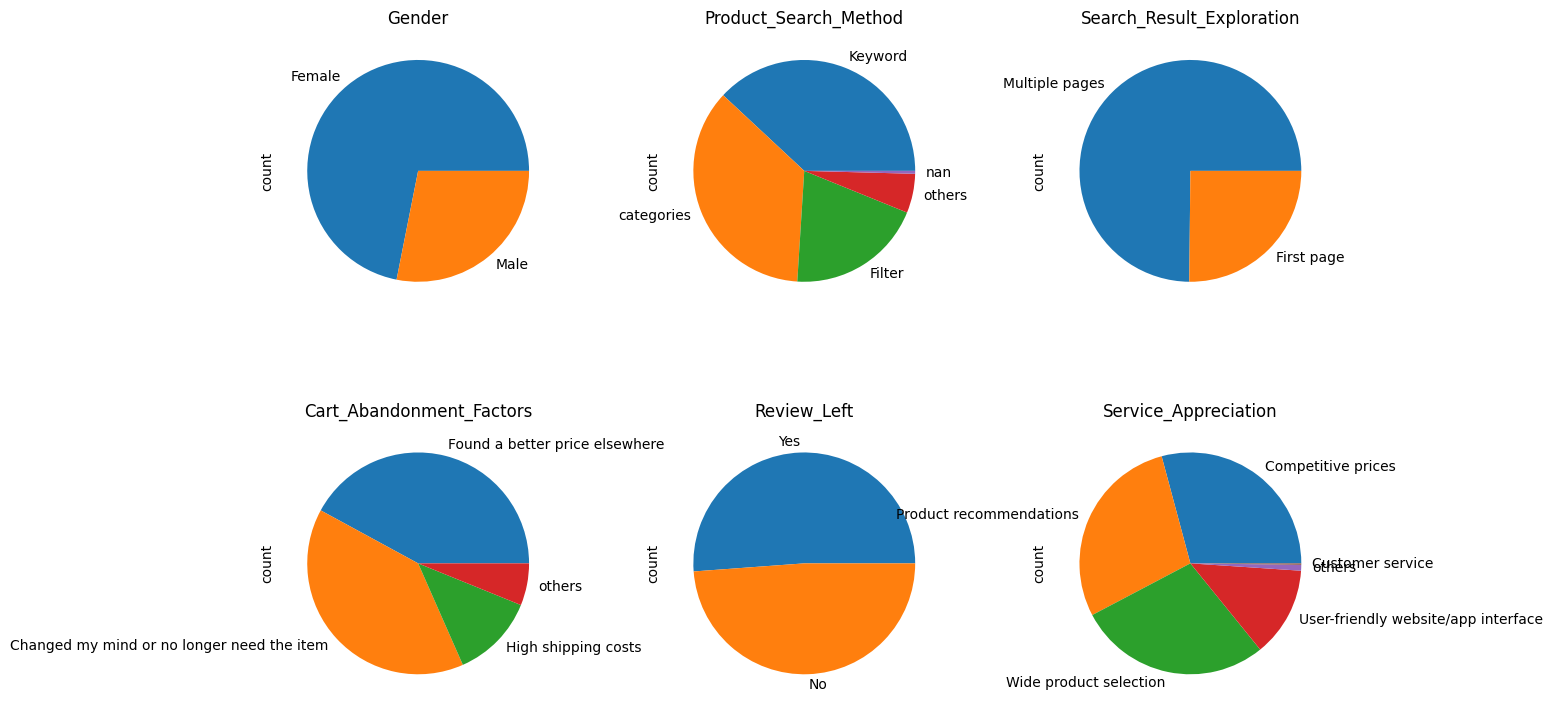

In [ ]:
# Initialize a 3x3 charts
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Flatten the axes array (makes it easier to iterate over)
axes = axes.flatten()

# Loop through each column and plot a histogram
for i, column in enumerate(df_qualitiative.columns):
    # Add the histogram
    df_qualitiative[column].value_counts(dropna=False).plot(kind="pie",ax=axes[i])
    # Add title and axis label
    axes[i].set_title(f'{column}')

# Adjust layout
plt.tight_layout()

# Show the plot

In [ ]:
print(len(df_qualitiative['Gender'].value_counts(dropna=False)))

2


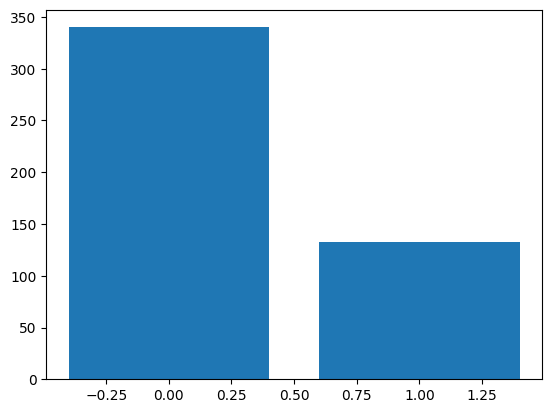

In [ ]:

plt.bar(range(len(df_qualitiative['Gender'].value_counts(dropna=False))), df_qualitiative['Gender'].value_counts(dropna=False))

plt.show()

In [ ]:
df_quantiative.reset_index(drop=True, inplace=True)
for i in range(df_quantiative.shape[0]):
  if df_quantiative.at[i,'age'] < 23:
    df_quantiative.at[i,'age'] = 'students'
  elif df_quantiative.at[i,'age'] >= 23 and df_quantiative.at[i,'age'] <30:
    df_quantiative.at[i,'age'] = 'labours'
  elif df_quantiative.at[i,'age'] >= 30 and df_quantiative.at[i,'age'] < 45:
    df_quantiative.at[i,'age'] = 'married'
  else:
    df_quantiative.at[i,'age'] = 'olders'

<ipython-input-64-feab9c872523>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'labours' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_quantiative.at[i,'age'] = 'labours'


In [ ]:
df_qualitiative.reset_index(drop=True, inplace=True)
df_quantiative['Gender'] = df_qualitiative['Gender']
df_quantiative

,age,Purchase_Frequency,Browsing_Frequency,Rating_Accuracy_Recommendations,Customer_Reviews_Importance,Add_to_Cart_Browsing,Cart_Completion_Frequency,Saveforlater_Frequency,Review_Reliability,Review_Helpfulness,Personalized_Recommendation,Recommendation_Helpfulness,Shopping_Satisfaction,Gender
0,labours,3,3,1,1,3,3,3,3,3,2,3,1,Female
1,labours,2,2,3,1,3,4,2,5,3,2,2,2,Female
2,labours,2,2,3,5,2,3,3,5,3,3,2,4,Female
3,students,1,2,2,1,3,3,2,5,3,4,3,2,Female
4,students,1,1,5,1,3,2,1,5,3,5,1,2,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
468,labours,4,3,3,4,2,3,3,4,2,3,2,4,Female
469,labours,4,3,3,3,2,3,3,5,2,3,2,3,Female
470,labours,2,3,2,3,2,3,3,3,2,3,2,3,Female
471,labours,3,2,2,1,3,4,3,5,3,2,3,2,Female


In [ ]:
df.reset_index(drop=True, inplace=True)
df_qualitiative['Improvement_Areas'] = df['Improvement_Areas']
df_qualitiative['age'] = df_quantiative['age']
df_qualitiative

,Gender,Product_Search_Method,Search_Result_Exploration,Cart_Abandonment_Factors,Review_Left,Service_Appreciation,Improvement_Areas,age
0,Female,Keyword,Multiple pages,Found a better price elsewhere,Yes,Competitive prices,Reducing packaging waste,labours
1,Female,Keyword,Multiple pages,High shipping costs,No,Wide product selection,Reducing packaging waste,labours
2,Female,Keyword,First page,Found a better price elsewhere,Yes,Competitive prices,Product quality and accuracy,labours
3,Female,Filter,Multiple pages,High shipping costs,No,Competitive prices,Product quality and accuracy,students
4,Female,categories,Multiple pages,Changed my mind or no longer need the item,No,Wide product selection,Product quality and accuracy,students
...,...,...,...,...,...,...,...,...
468,Female,categories,Multiple pages,Found a better price elsewhere,Yes,Competitive prices,Customer service responsiveness,labours
469,Female,Filter,Multiple pages,Found a better price elsewhere,Yes,Product recommendations,Reducing packaging waste,labours
470,Female,categories,Multiple pages,High shipping costs,Yes,Wide product selection,Product quality and accuracy,labours
471,Female,Keyword,Multiple pages,others,No,Wide product selection,Product quality and accuracy,labours


Tiền

In [ ]:
df_quantiative.columns

Index(['Purchase_Frequency', 'Browsing_Frequency',
       'Rating_Accuracy_Recommendations', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Saveforlater_Frequency', 'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation', 'Recommendation_Helpfulness',
       'Shopping_Satisfaction', 'age', 'Gender'],
      dtype='object')

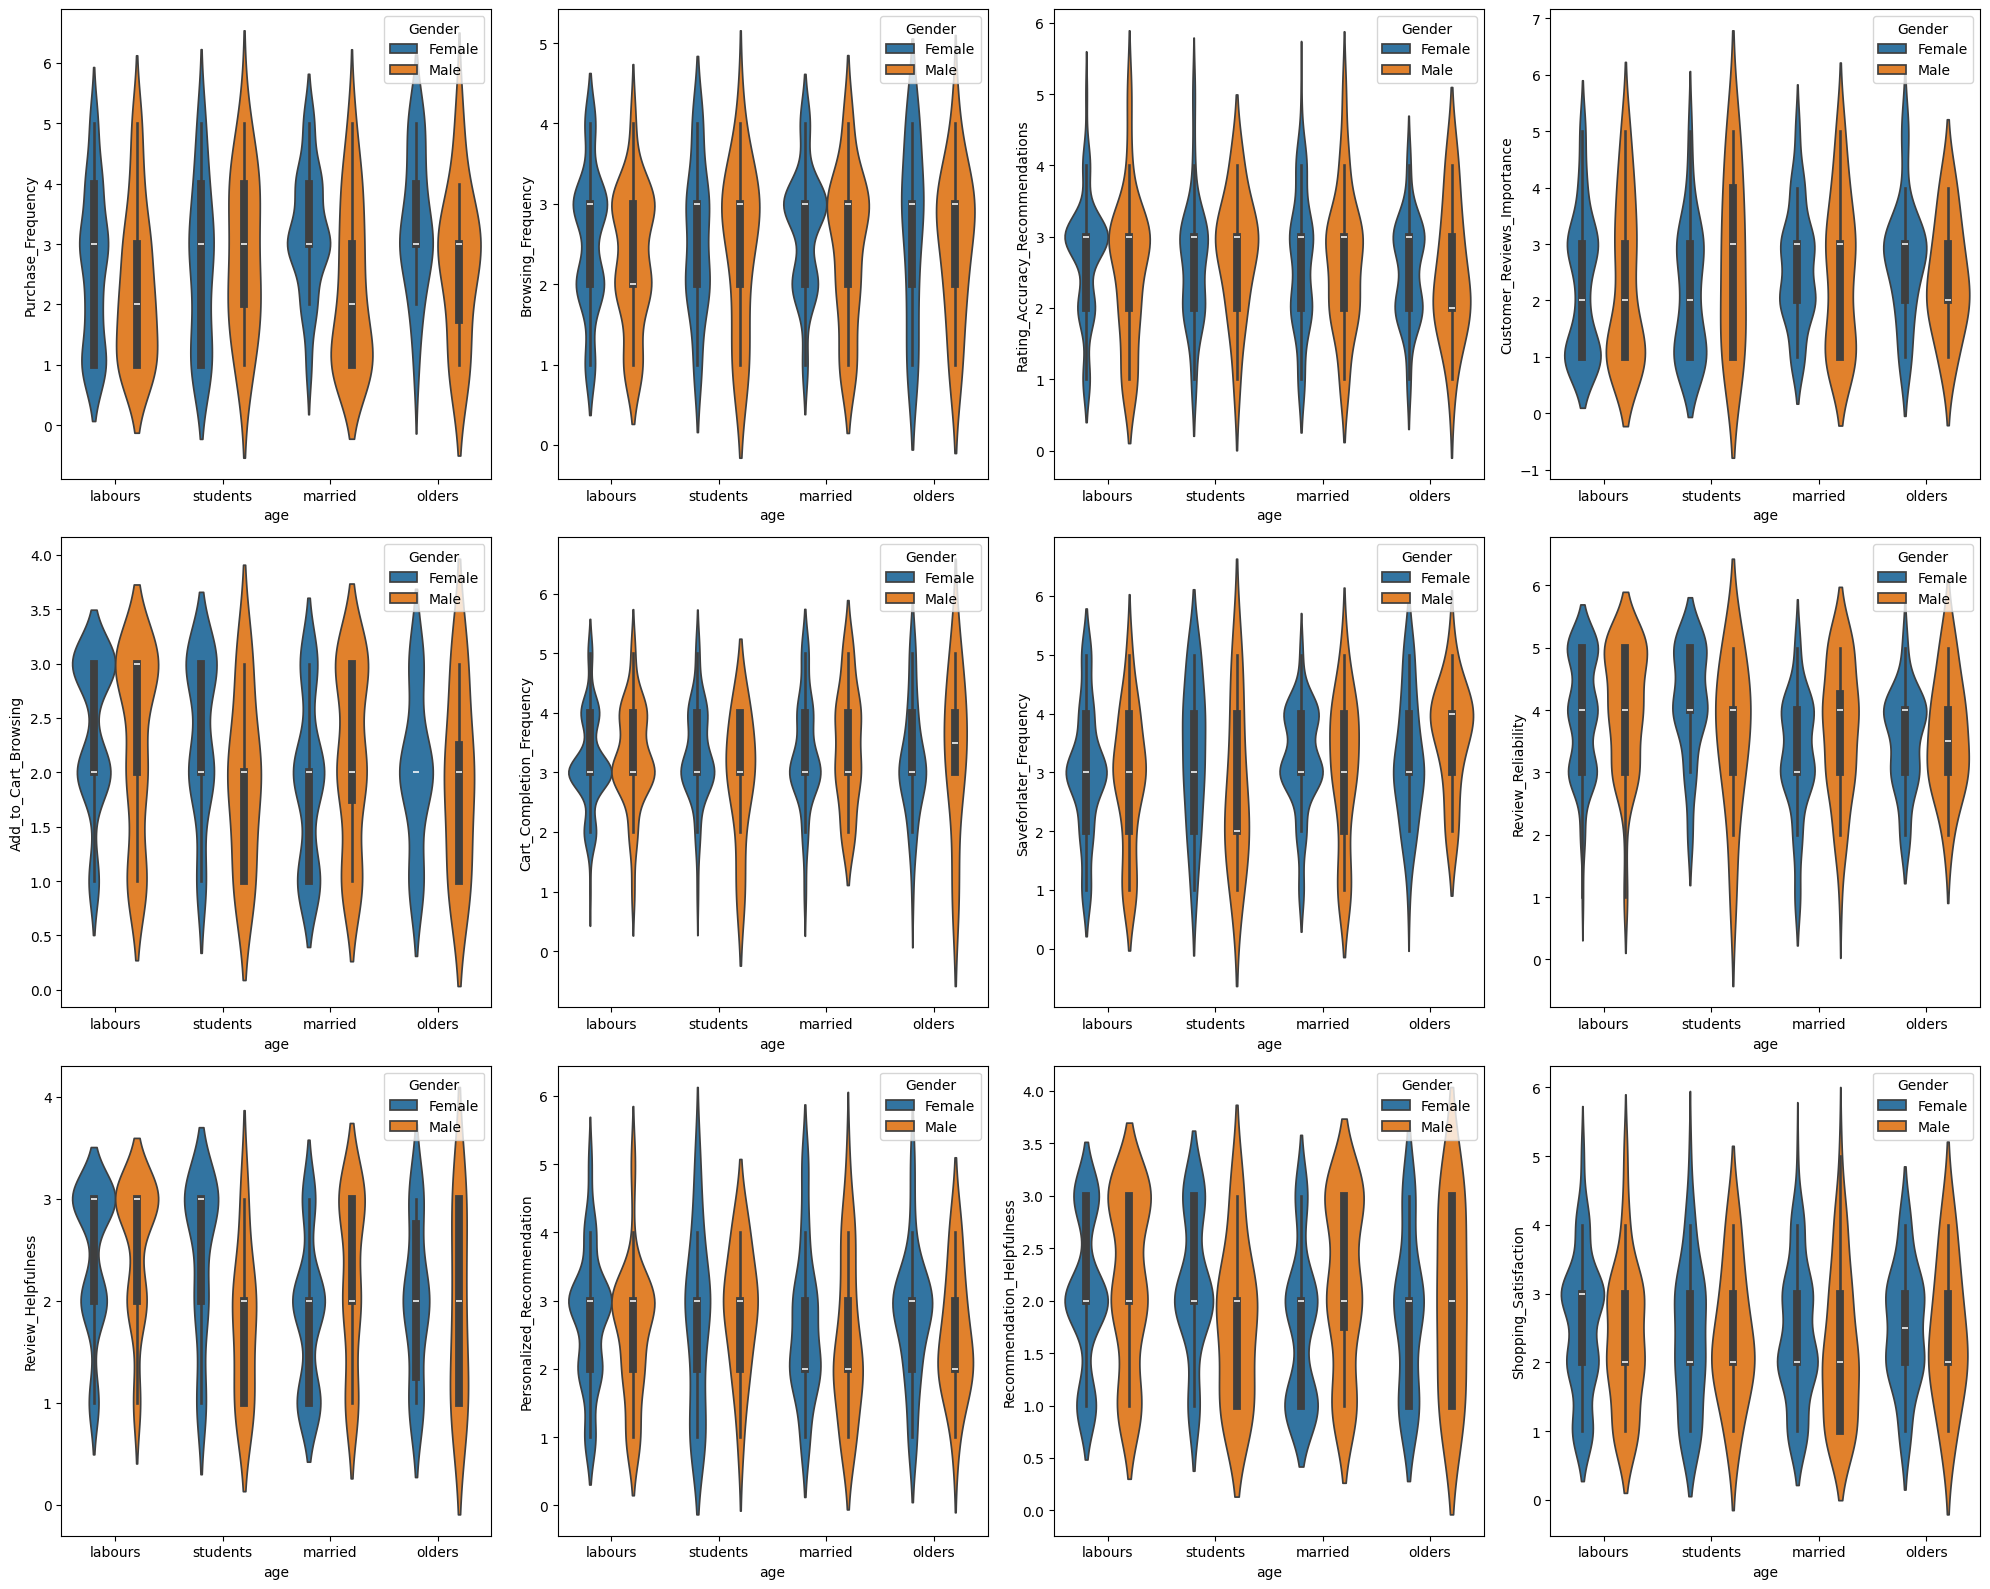

In [ ]:
x`fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 16))
axes = axes.flatten()
k = 0
for i in ['Purchase_Frequency', 'Browsing_Frequency',
       'Rating_Accuracy_Recommendations', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Saveforlater_Frequency', 'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation', 'Recommendation_Helpfulness',
       'Shopping_Satisfaction']:
  sns.violinplot(x='age', y=i, data=df_quantiative, hue='Gender', ax=axes[k])
  k += 1
plt.tight_layout()
# Show the plot
plt.show()

In [ ]:
df_qualitiative_male = df_qualitiative.copy()
df_qualitiative_male['age'] = 'Male -' + df_qualitiative_male['age']
df_qualitiative_female = df_qualitiative.copy()
df_qualitiative_female['age'] = 'Female -' + df_qualitiative_female['age']


In [ ]:
df_qualitiative_female

,Gender,Product_Search_Method,Search_Result_Exploration,Cart_Abandonment_Factors,Review_Left,Service_Appreciation,Improvement_Areas,age
0,Female,Keyword,Multiple pages,Found a better price elsewhere,Yes,Competitive prices,Reducing packaging waste,Female -labours
1,Female,Keyword,Multiple pages,High shipping costs,No,Wide product selection,Reducing packaging waste,Female -labours
2,Female,Keyword,First page,Found a better price elsewhere,Yes,Competitive prices,Product quality and accuracy,Female -labours
3,Female,Filter,Multiple pages,High shipping costs,No,Competitive prices,Product quality and accuracy,Female -students
4,Female,categories,Multiple pages,Changed my mind or no longer need the item,No,Wide product selection,Product quality and accuracy,Female -students
...,...,...,...,...,...,...,...,...
468,Female,categories,Multiple pages,Found a better price elsewhere,Yes,Competitive prices,Customer service responsiveness,Female -labours
469,Female,Filter,Multiple pages,Found a better price elsewhere,Yes,Product recommendations,Reducing packaging waste,Female -labours
470,Female,categories,Multiple pages,High shipping costs,Yes,Wide product selection,Product quality and accuracy,Female -labours
471,Female,Keyword,Multiple pages,others,No,Wide product selection,Product quality and accuracy,Female -labours


In [ ]:
df_qualitiative_male

,Gender,Product_Search_Method,Search_Result_Exploration,Cart_Abandonment_Factors,Review_Left,Service_Appreciation,Improvement_Areas,age
0,Female,Keyword,Multiple pages,Found a better price elsewhere,Yes,Competitive prices,Reducing packaging waste,Male -labours
1,Female,Keyword,Multiple pages,High shipping costs,No,Wide product selection,Reducing packaging waste,Male -labours
2,Female,Keyword,First page,Found a better price elsewhere,Yes,Competitive prices,Product quality and accuracy,Male -labours
3,Female,Filter,Multiple pages,High shipping costs,No,Competitive prices,Product quality and accuracy,Male -students
4,Female,categories,Multiple pages,Changed my mind or no longer need the item,No,Wide product selection,Product quality and accuracy,Male -students
...,...,...,...,...,...,...,...,...
468,Female,categories,Multiple pages,Found a better price elsewhere,Yes,Competitive prices,Customer service responsiveness,Male -labours
469,Female,Filter,Multiple pages,Found a better price elsewhere,Yes,Product recommendations,Reducing packaging waste,Male -labours
470,Female,categories,Multiple pages,High shipping costs,Yes,Wide product selection,Product quality and accuracy,Male -labours
471,Female,Keyword,Multiple pages,others,No,Wide product selection,Product quality and accuracy,Male -labours


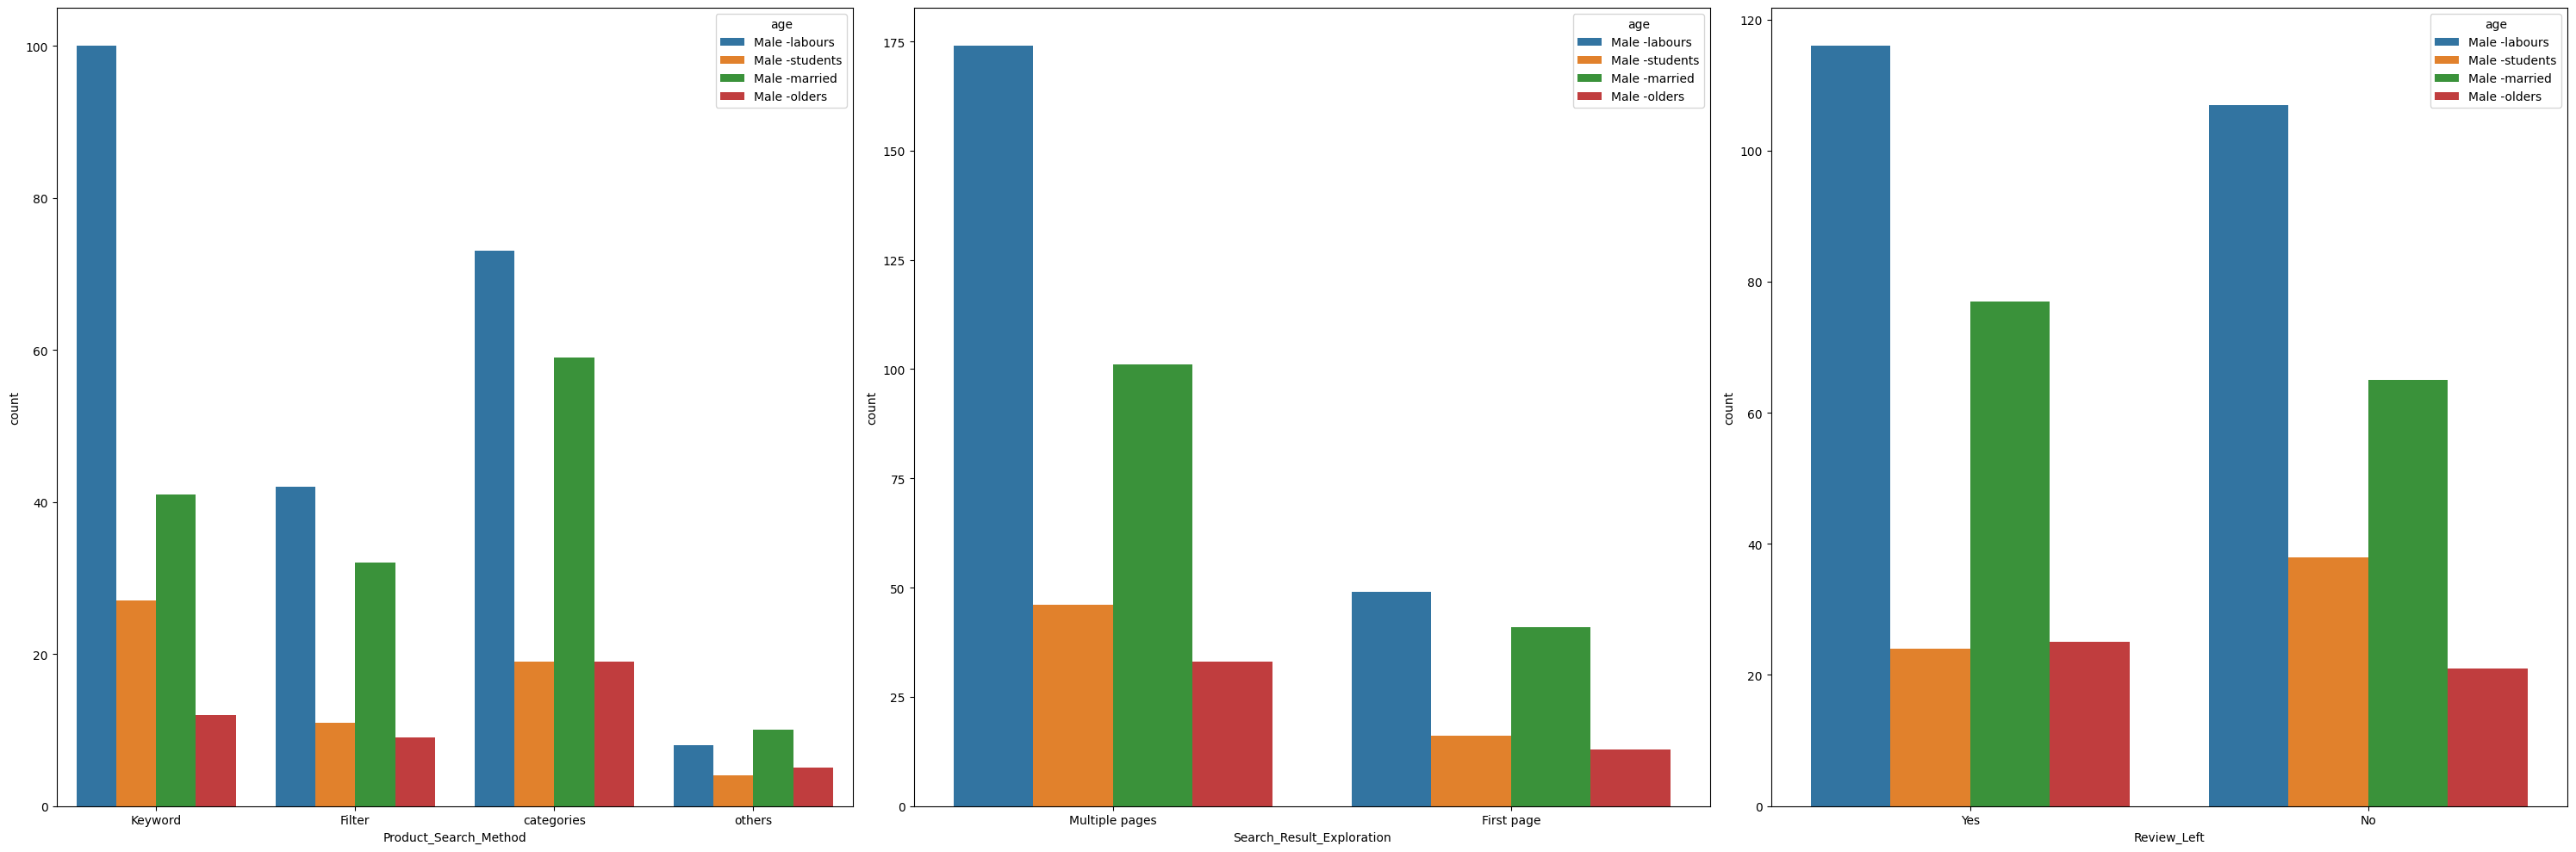

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
axes = axes.flatten()
k = 0
for i in ['Product_Search_Method', 'Search_Result_Exploration',
        'Review_Left']:
  sns.countplot(x= i, hue='age', ax=axes[k], data= df_qualitiative_male)

  k += 1
plt.tight_layout()
# Show the plot
plt.show()

<ipython-input-75-3887a7988ca4>:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x= df_qualitiative_male.loc[filtered_values][i], hue='age', ax=axes[k], palette = sns.color_palette("Set2"), data= df_qualitiative_female.loc[filtered_values])
<ipython-input-75-3887a7988ca4>:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x= df_qualitiative_male.loc[filtered_values][i], hue='age', ax=axes[k], palette = sns.color_palette("Set2"), data= df_qualitiative_female.loc[filtered_values])
<ipython-input-75-3887a7988ca4>:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x= df_qualitiative_male.loc[filtered_values][i], hue='age', ax=axes[k], palette = sns.color_palette("Set2"), data= df_qualitiative_female.loc[filtered_values])


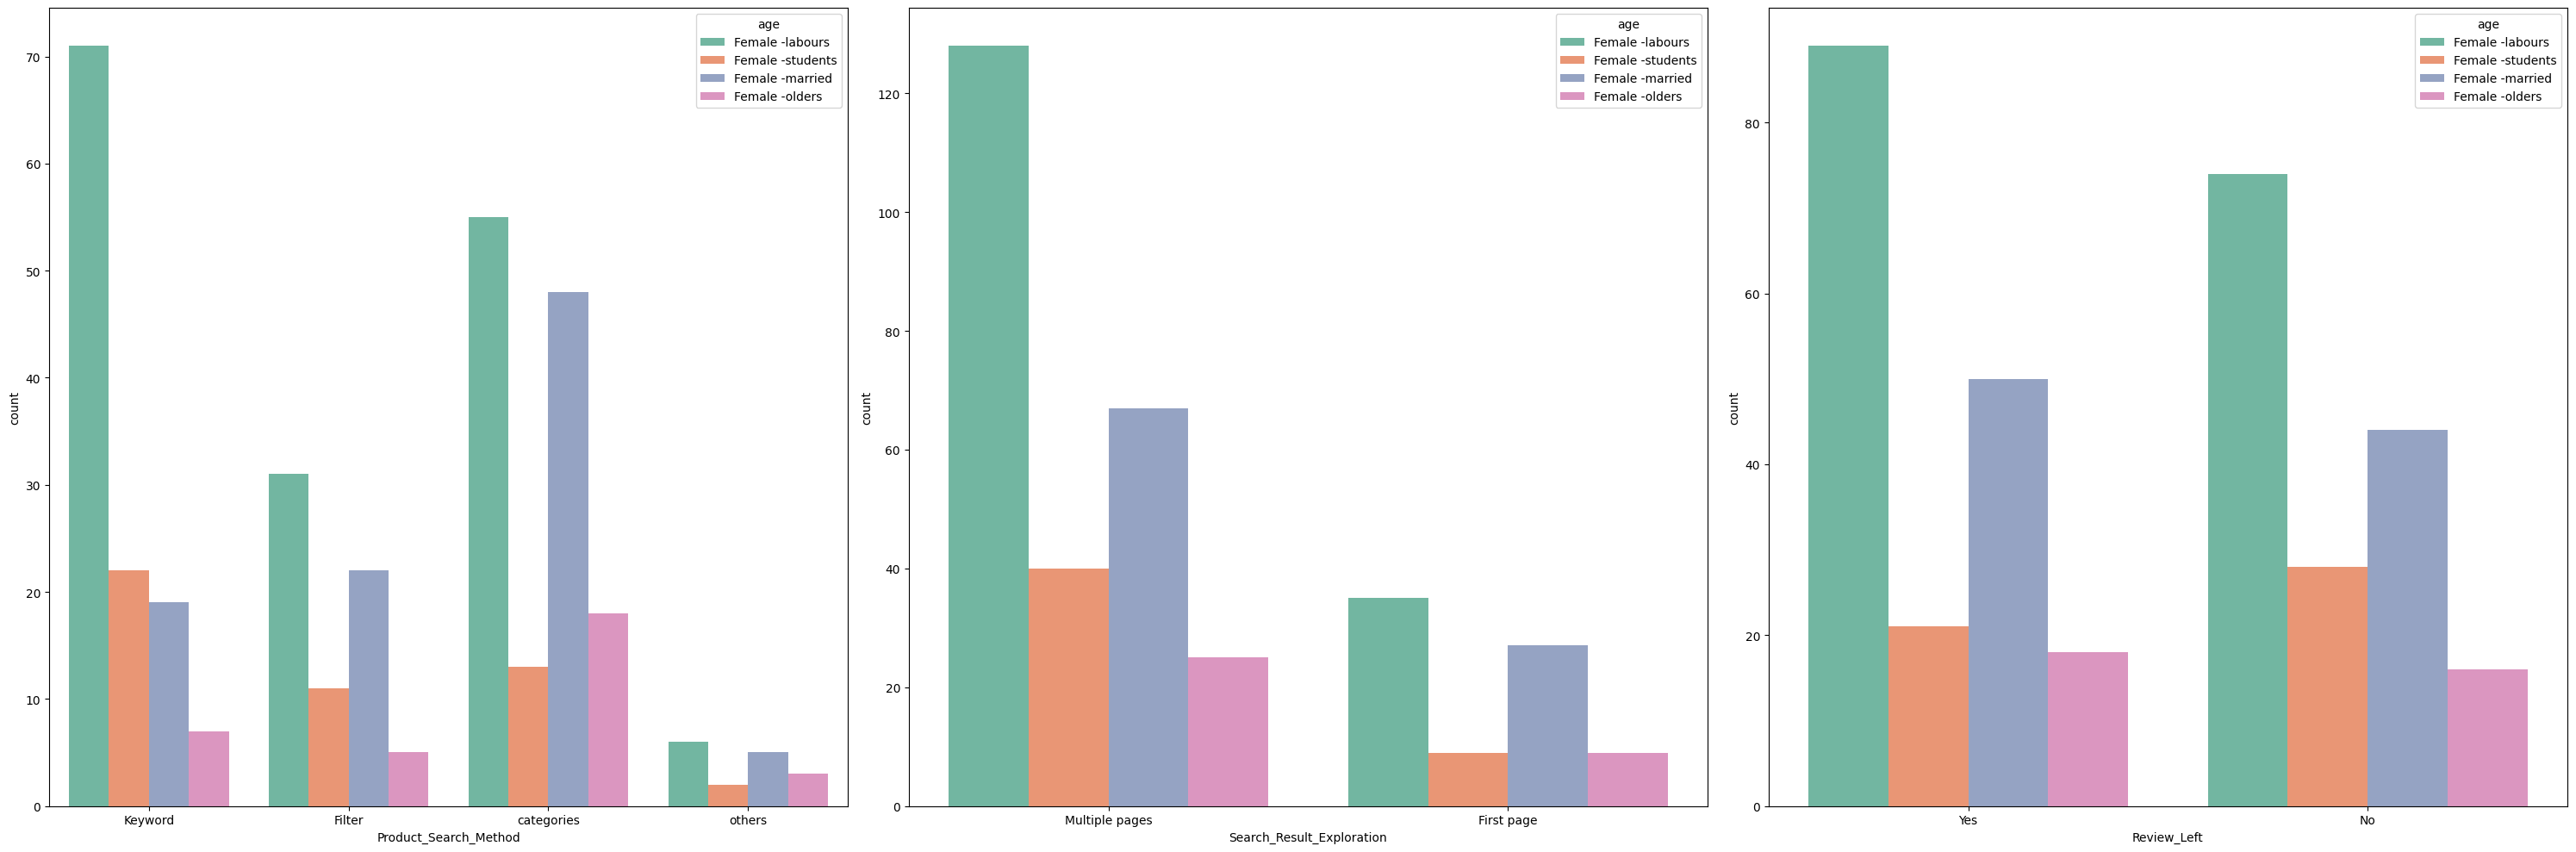

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
axes = axes.flatten()
k = 0
for i in ['Product_Search_Method', 'Search_Result_Exploration',
        'Review_Left']:
  filtered_values = np.where((df_qualitiative_male['Gender'] == 'Female'))
  sns.countplot(x= df_qualitiative_male.loc[filtered_values][i], hue='age', ax=axes[k], palette = sns.color_palette("Set2"), data= df_qualitiative_female.loc[filtered_values])
  k += 1
plt.tight_layout()
# Show the plot
plt.show()

<ipython-input-76-c1362e6589cf>:8: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x= df_qualitiative_female.loc[filtered_values][i], hue='age', ax=axes[k], palette = sns.color_palette("Set2"), data= df_qualitiative_female.loc[filtered_values])
<ipython-input-76-c1362e6589cf>:8: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x= df_qualitiative_female.loc[filtered_values][i], hue='age', ax=axes[k], palette = sns.color_palette("Set2"), data= df_qualitiative_female.loc[filtered_values])
<ipython-input-76-c1362e6589cf>:8: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x= df_qualitiative_female.loc[filtered_values][i], hue='age', ax=axes[k], palette = sns.color_palette("Set2"), data= df_qualitiative_female.loc[filtered_values])


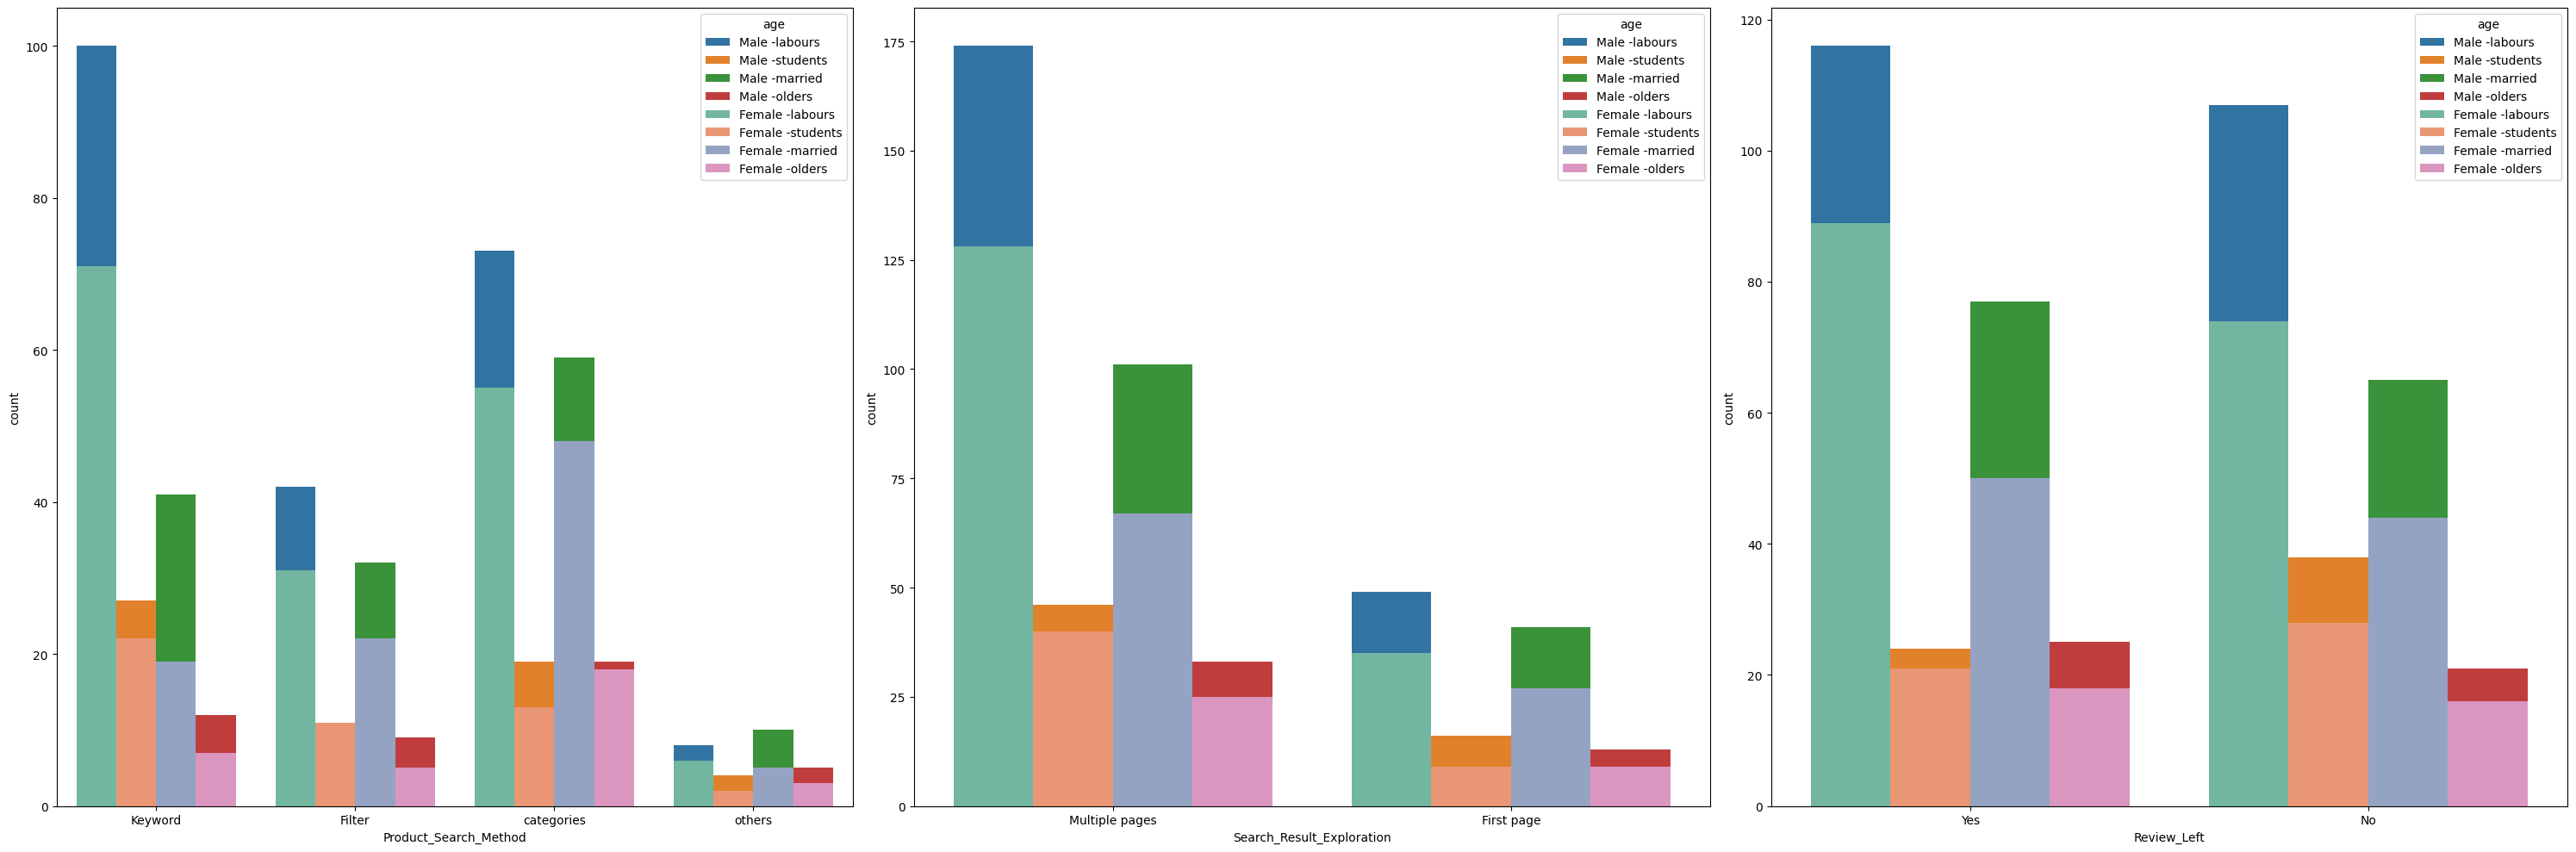

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
axes = axes.flatten()
k = 0
for i in ['Product_Search_Method', 'Search_Result_Exploration',
        'Review_Left']:
  sns.countplot(x= i, hue='age', ax=axes[k], data= df_qualitiative_male)
  filtered_values = np.where((df_qualitiative_female['Gender'] == 'Female'))
  sns.countplot(x= df_qualitiative_female.loc[filtered_values][i], hue='age', ax=axes[k], palette = sns.color_palette("Set2"), data= df_qualitiative_female.loc[filtered_values])
  k += 1
plt.tight_layout()
# Show the plot
plt.show()

<ipython-input-77-7e95ca72a2b0>:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x= df_qualitiative_female.loc[filtered_values][i], hue='age', ax=axes[k], palette = sns.color_palette("Set2"), data= df_qualitiative_female.loc[filtered_values])
<ipython-input-77-7e95ca72a2b0>:7: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.countplot(x= df_qualitiative_female.loc[filtered_values][i], hue='age', ax=axes[k], palette = sns.color_palette("Set2"), data= df_qualitiative_female.loc[filtered_values])


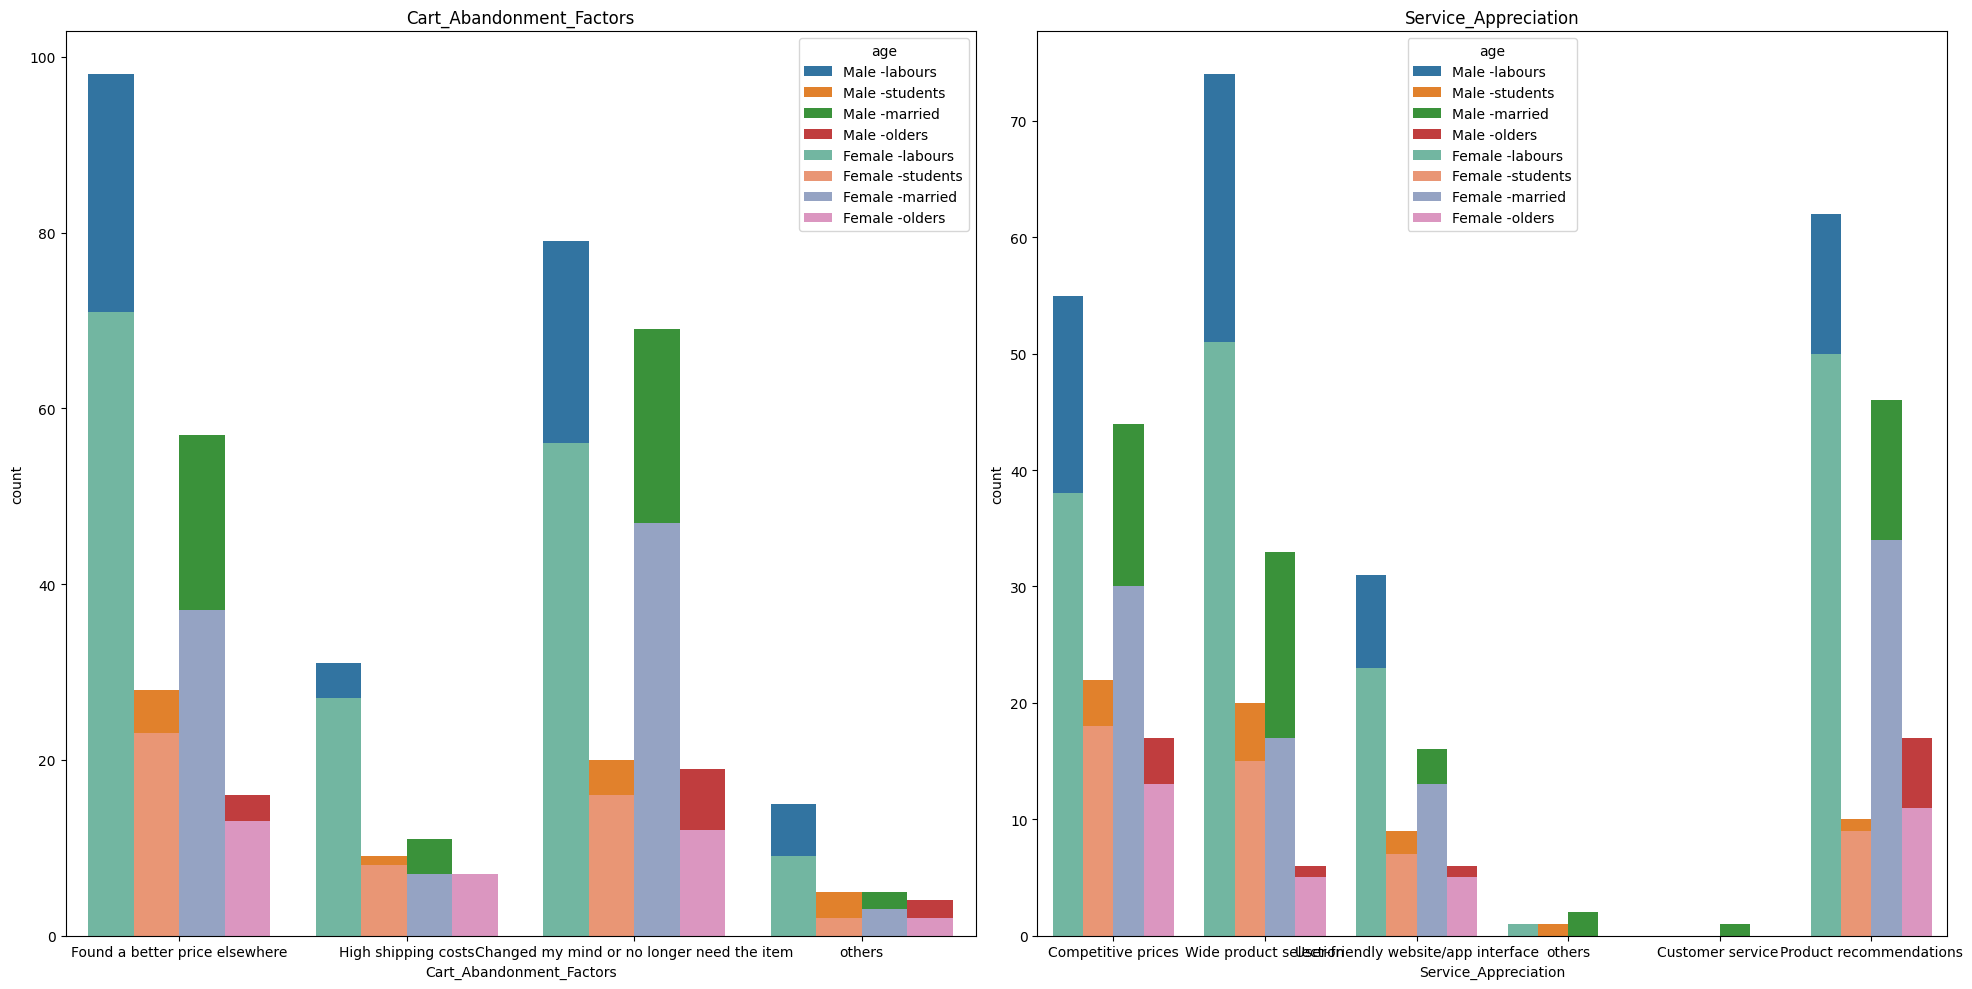

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axes = axes.flatten()
k = 0
for i in ['Cart_Abandonment_Factors', 'Service_Appreciation']:
  sns.countplot(x= i, hue='age', ax=axes[k], data= df_qualitiative_male)
  filtered_values = np.where((df_qualitiative_female['Gender'] == 'Female'))
  sns.countplot(x= df_qualitiative_female.loc[filtered_values][i], hue='age', ax=axes[k], palette = sns.color_palette("Set2"), data= df_qualitiative_female.loc[filtered_values])
  axes[k].set_title(f'{i}')
  k += 1
plt.tight_layout()
# Show the plot
plt.show()